In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
# Importing the dataset
X_train_raw = pd.read_csv('D:/Downloads/Competition/regression_comp_starter_kit/Header - train.txt')
X_test_raw = pd.read_csv('D:/Downloads/Competition/regression_comp_starter_kit/Header - test.txt')
y_train_raw = pd.read_csv('D:/Downloads/Competition/regression_comp_starter_kit/Viking - Train.txt')
X_validate_raw = pd.read_csv('D:/Downloads/Competition/regression_comp_starter_kit//Header - validation.txt')
y_validate_raw = pd.read_csv('D:/Downloads/Competition/regression_comp_starter_kit/Viking - Validation.txt')

In [3]:
print('The rows and columns of independent variable is ', X_train_raw.shape)
print('the raw and coulmn of the dependent variable is ' , y_train_raw.shape)
print('the raw and coulmn of the dependent variable is ' , X_test_raw.shape)


The rows and columns of independent variable is  (588673, 90)
the raw and coulmn of the dependent variable is  (6256, 6)
the raw and coulmn of the dependent variable is  (118076, 90)


# Start from here

In [4]:
Z=pd.merge(X_train_raw, y_train_raw , on='EPAssetsId' ,how='inner')
ZV=pd.merge(X_validate_raw, y_validate_raw , on='EPAssetsId' ,how='inner')
ZVV=X_test_raw


In [5]:
Z['SurfAbandon']=np.where(Z.SurfAbandonDate.isnull(),0,1)
ZV['SurfAbandon']=np.where(ZV.SurfAbandonDate.isnull(),0,1)
ZVV['SurfAbandon']=np.where(ZVV.SurfAbandonDate.isnull(),0,1)

# Imputing

In [6]:
Z['_Fracture`Stages']=Z['_Fracture`Stages'].replace(np.nan,0)
Z['_Completion`Events']=Z['_Completion`Events'].replace(np.nan,0)
Z['ProjectedDepth']=Z['ProjectedDepth'].replace(np.nan,Z.ProjectedDepth.mean())
Z['TVD']=Z['TVD'].replace(np.nan,0)
Z['Surf_Longitude']=Z['Surf_Longitude'].replace(np.nan,Z.Surf_Longitude.mean())
Z['Surf_Latitude']=Z['Surf_Latitude'].replace(np.nan,Z.Surf_Latitude.mean())

Z['_Max`Prod`(BOE)']=Z['_Max`Prod`(BOE)'].replace(np.nan,Z['_Max`Prod`(BOE)'].mean())
Z['_Normalized`IP`(Oil`-`Bbls)']=Z['_Normalized`IP`(Oil`-`Bbls)'].replace(np.nan,0)
Z['_Normalized`IP`Gas`(Boe/d)']=Z['_Normalized`IP`Gas`(Boe/d)'].replace(np.nan,0)
Z['_Normalized`IP`(Water`-`Bbls)']=Z['_Normalized`IP`(Water`-`Bbls)'].replace(np.nan,0)
ZV['_Normalized`IP`(Oil`-`Bbls)']=ZV['_Normalized`IP`(Oil`-`Bbls)'].replace(np.nan,0)
ZV['_Normalized`IP`Gas`(Boe/d)']=ZV['_Normalized`IP`Gas`(Boe/d)'].replace(np.nan,0)
ZV['_Normalized`IP`(Water`-`Bbls)']=ZV['_Normalized`IP`(Water`-`Bbls)'].replace(np.nan,0)

In [11]:
'''#collinearity between predictors
corr =df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# colinearity between fracture stages and completion events(Fracture stages will be dropped)
# colinearity between TotalDepth , TVD and projected depth TotalDepth and ProjectedDepth will be dropped)'''

'#collinearity between predictors\ncorr =df.corr()\nplt.figure(figsize = (16,12))\nsns.heatmap(corr, \n            xticklabels=corr.columns.values,\n            yticklabels=corr.columns.values)\n# colinearity between fracture stages and completion events(Fracture stages will be dropped)\n# colinearity between TotalDepth , TVD and projected depth TotalDepth and ProjectedDepth will be dropped)'

In [12]:
'''# save correlations to variable
corr = df.corr()
# we can create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# generate heatmap
plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, center=0, mask=mask, cmap='gnuplot')
plt.show()'''

"# save correlations to variable\ncorr = df.corr()\n# we can create a mask to not show duplicate values\nmask = np.zeros_like(corr, dtype=np.bool)\nmask[np.triu_indices_from(mask)] = True\n# generate heatmap\nplt.figure(figsize= (12,12))\nsns.heatmap(corr, annot=True, center=0, mask=mask, cmap='gnuplot')\nplt.show()"

In [13]:
'''
corr_list = sorted(df.corr().to_dict()['_Normalized`IP`(Oil`-`Bbls)'].items(), key=lambda x: x[1], reverse=True)
corr_list'''

"\ncorr_list = sorted(df.corr().to_dict()['_Normalized`IP`(Oil`-`Bbls)'].items(), key=lambda x: x[1], reverse=True)\ncorr_list"

In [11]:

'''for col in Z:
    if(Z[col].dtype == np.float64 or Z[col].dtype == np.int64):
        sns.regplot(x=Z[col], y=Z['_Normalized`IP`(Oil`-`Bbls)'], data=Z, label=col)
        plt.ylabel('Oil Production')
        plt.xlabel(col)
        plt.legend()
        plt.tight_layout()
        plt.show()'''

"for col in Z:\n    if(Z[col].dtype == np.float64 or Z[col].dtype == np.int64):\n        sns.regplot(x=Z[col], y=Z['_Normalized`IP`(Oil`-`Bbls)'], data=Z, label=col)\n        plt.ylabel('Oil Production')\n        plt.xlabel(col)\n        plt.legend()\n        plt.tight_layout()\n        plt.show()"

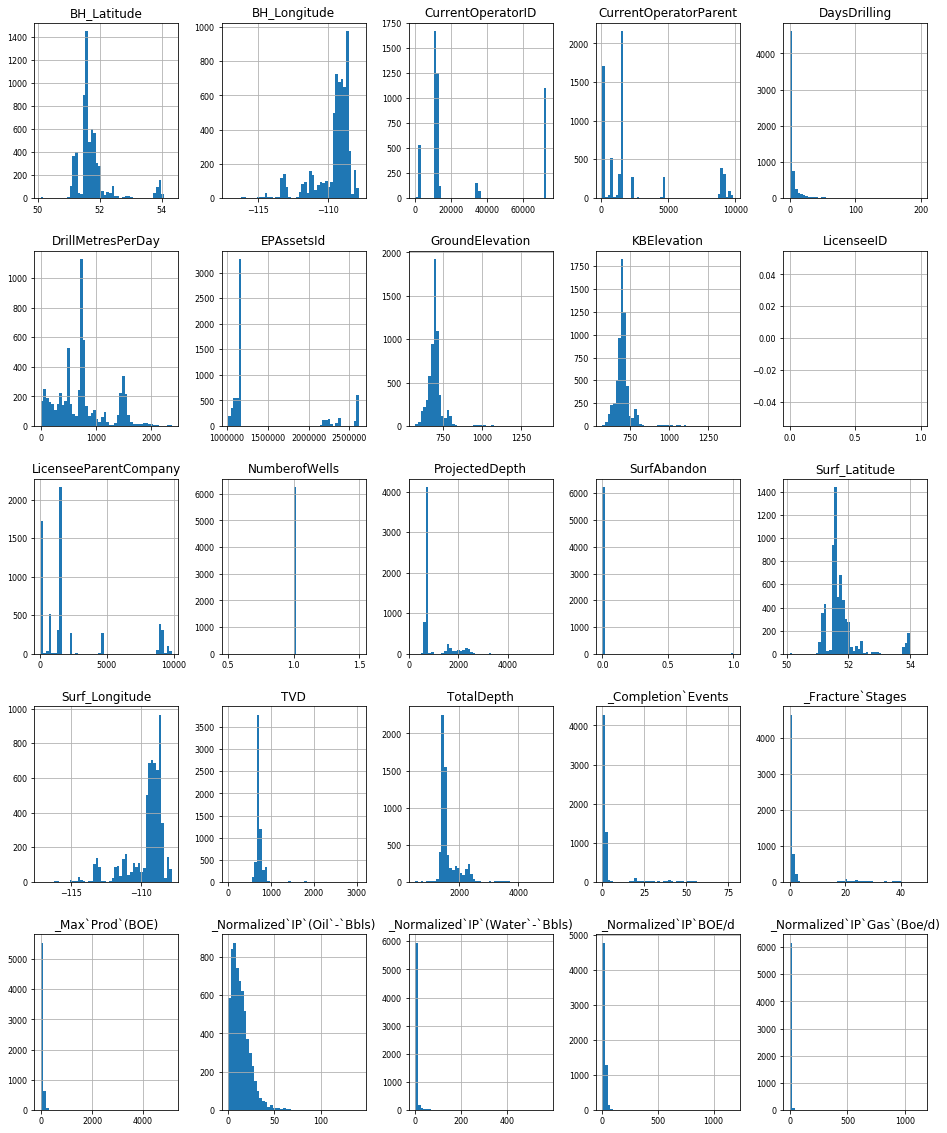

In [13]:
Z.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [14]:
Z.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence'],'Development',inplace=True)
Z.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
Z.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)

ZV.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence'],'Development',inplace=True)
ZV.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
ZV.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)


ZVV.LaheeClass.replace(['Confidential', 'Development Service Well','Non Issued Licence',],'Development',inplace=True)
ZVV.LaheeClass.replace(['Deeper Pool Test', 'Experimental','Oil Sands Evaluation','Potash Test Hole','Re-entry','Shallower Pool Test','Test Hole'],'Test',inplace=True)
ZVV.LaheeClass.replace(['New Pool Wildcat', 'New Field Wildcat','Deeper Pool Wildcat'],'WildCat',inplace=True)
ZVV.LaheeClass.replace(['Unspecified'],'Other',inplace=True)
ZV.loc[1,'LaheeClass']='Test'

In [15]:
ZVV['TotalDepth']=ZVV['TotalDepth'].fillna(0)
Z['TotalDepth']=Z['TotalDepth'].fillna(0)
ZV['TotalDepth']=ZV['TotalDepth'].fillna(0)
ZVV['TVD']=ZVV['TVD'].fillna(1)
Z['TVD']=Z['TVD'].fillna(1)
ZV['TVD']=ZV['TVD'].fillna(1)
ZVV['TVD']=ZVV['TVD'].replace(0,1)
Z['TVD']=Z['TVD'].replace(0,1)
ZV['TVD']=ZV['TVD'].replace(0,1)


In [16]:
Z['MD/TVD']=Z['TotalDepth']/Z['TVD']
ZV['MD/TVD']=ZV['TotalDepth']/ZV['TVD']
ZVV['MD/TVD']=ZVV['TotalDepth']/ZVV['TVD']

In [17]:
Z['MD/TVD']=Z['MD/TVD'].fillna(0)
ZV['MD/TVD']=ZV['MD/TVD'].fillna(0)
ZVV['MD/TVD']=ZVV['MD/TVD'].fillna(0)

In [18]:
ZVV.WellProfile.replace('Slant','Directional',inplace=True)
ZVV.WellProfile.replace('Horizontal Leg','Horizontal',inplace=True)

In [19]:
Z['_Fracture`Stages']=Z['_Fracture`Stages'].fillna(0)
ZV['_Fracture`Stages']=ZV['_Fracture`Stages'].fillna(0)
ZVV['_Fracture`Stages']=ZVV['_Fracture`Stages'].fillna(0)

In [27]:
#X_Select = ['EPAssetsId', 'Formation' , 'TotalDepth' , 'LaheeClass' , "TVD", "WellProfile" , '_Open`Hole']

#,'_Open`Hole' not effective
#replace TVD with MD/TVD    ,,, ,'_Fracture`Stages'
# 'TVD' & 'SurfAbandon' &"WellProfile" & '_Fracture`Stages'  gives negative for col 1 & 2
# 'Surf_Longitude' gives negative for col 1 

X_Select =['EPAssetsId','_Max`Prod`(BOE)', 'Surf_Latitude','TotalDepth','LaheeClass']
X_train = Z[X_Select ]
X_validate = ZV[X_Select ]
X_test= ZVV[X_Select ]
X_Select2 = ['EPAssetsId','Surf_Longitude','_Max`Prod`(BOE)', 'Surf_Latitude','TotalDepth','LaheeClass']
X_train2=Z[X_Select2 ]
X_validate2 = ZV[X_Select2 ] 
X_test2= ZVV[X_Select2 ]
#'Surf_Longitude',gives negative for DT
X_Select3= ['EPAssetsId','Surf_Longitude','_Max`Prod`(BOE)', 'Surf_Latitude','TotalDepth','LaheeClass']
X_train3 = Z[X_Select3]
X_validate3 = ZV[X_Select3 ] 
X_test3= ZVV[X_Select3 ]

'''X_Select = ['EPAssetsId','Surf_Latitude', '_Max`Prod`(BOE)','TotalDepth']
X_train = Z[X_Select ]
X_validate = ZV[X_Select ]
X_test= ZVV[X_Select ]
X_Select2 = ['EPAssetsId','Surf_Longitude','_Max`Prod`(BOE)', 'Surf_Latitude','TotalDepth','LaheeClass']
X_train2=Z[X_Select2 ]
X_validate2 = ZV[X_Select2 ] 
X_test2= ZVV[X_Select2 ]
#'Surf_Longitude',gives negative for DT
X_Select3= ['EPAssetsId', 'Surf_Latitude']
X_train3 = Z[X_Select3]
X_validate3 = ZV[X_Select3 ] 
X_test3= ZVV[X_Select3 ]'''


Column1 = [ 'EPAssetsId', '_Normalized`IP`(Oil`-`Bbls)']
y_train = Z[Column1]
y_validate =ZV[Column1]


Column2=[ 'EPAssetsId','_Normalized`IP`Gas`(Boe/d)']
y_train2=Z[Column2]
y_validate2 =ZV[Column2]

Column3 =[ 'EPAssetsId','_Normalized`IP`(Water`-`Bbls)']
y_train3=Z[Column3]
y_validate3 =ZV[Column3]

# Cleaning X_validate & y_validate

In [28]:
#X_validate['_Completion`Events']=X_validate['_Completion`Events'].replace(np.nan, 0)
#X_validate['TVD']=X_validate['TVD'].replace(np.nan,0) #X_validate['TVD'].mean()
X_validate['_Max`Prod`(BOE)']=X_validate['_Max`Prod`(BOE)'].replace(np.nan,0)#X_validate['_Max`Prod`(BOE)'].mean()
X_validate2['_Max`Prod`(BOE)']=X_validate2['_Max`Prod`(BOE)'].replace(np.nan,0)
X_validate3['_Max`Prod`(BOE)']=X_validate2['_Max`Prod`(BOE)'].replace(np.nan,0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [29]:
#X_test['_Completion`Events']=X_test['_Completion`Events'].replace(np.nan, 0)
#X_test['TVD']=X_test['TVD'].replace(np.nan,X_test['TVD'].mean()) 
X_test['_Max`Prod`(BOE)']=X_test['_Max`Prod`(BOE)'].replace(np.nan,X_test['_Max`Prod`(BOE)'].mean())
X_test2['_Max`Prod`(BOE)']=X_test2['_Max`Prod`(BOE)'].replace(np.nan,X_test['_Max`Prod`(BOE)'].mean())
X_test3['_Max`Prod`(BOE)']=X_test2['_Max`Prod`(BOE)'].replace(np.nan,X_test['_Max`Prod`(BOE)'].mean())
X_test['Surf_Latitude']=X_test['Surf_Latitude'].replace(np.nan,X_test['Surf_Latitude'].mean())
X_test2['Surf_Latitude']=X_test2['Surf_Latitude'].replace(np.nan,X_test2['Surf_Latitude'].mean())
X_test3['Surf_Latitude']=X_test3['Surf_Latitude'].replace(np.nan,X_test3['Surf_Latitude'].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [30]:
#One hot encoding - the code dropped the original column!
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
X_train=encode_and_bind(X_train, "LaheeClass")
X_train2=encode_and_bind(X_train2, "LaheeClass")
X_train3=encode_and_bind(X_train3, "LaheeClass")
#X_train=encode_and_bind(X_train, "WellProfile")
#X_train=encode_and_bind(X_train, '_Open`Hole')
#X_train=encode_and_bind(X_train, 'WellTypeStandardised')

#X_train=encode_and_bind(X_train, 'Formation')
#X_train=encode_and_bind(X_train, 'PSACAreaName')
X_validate=encode_and_bind(X_validate, "LaheeClass")
X_validate2=encode_and_bind(X_validate2, "LaheeClass")
X_validate3=encode_and_bind(X_validate3, "LaheeClass")
#X_validate=encode_and_bind(X_validate, "WellProfile")
#X_validate=encode_and_bind(X_validate, '_Open`Hole')
#X_validate=encode_and_bind(X_validate, 'WellTypeStandardised')
#X_validate=encode_and_bind(X_validate, 'Formation')
#X_validate=encode_and_bind(X_validate, 'PSACAreaName')
X_test=encode_and_bind(X_test, "LaheeClass")
X_test2=encode_and_bind(X_test2, "LaheeClass")
X_test3=encode_and_bind(X_test3, "LaheeClass")
#X_test=encode_and_bind(X_test, "WellProfile")
#X_test=encode_and_bind(X_test, '_Open`Hole')
#X_test=encode_and_bind(X_test, 'WellTypeStandardised')
#X_test=encode_and_bind(X_test, 'Formation')
#X_train=encode_and_bind(X_test, 'PSACAreaName')

In [31]:
M=pd.concat([X_train , y_train], axis=1)
M.corr()

,EPAssetsId,_Max`Prod`(BOE),Surf_Latitude,TotalDepth,LaheeClass_Other,LaheeClass_Outpost,LaheeClass_Test,LaheeClass_WildCat,EPAssetsId,_Normalized`IP`(Oil`-`Bbls)
EPAssetsId,1.000000,0.162752,0.668547,0.473162,0.021525,-0.111741,0.019880,-0.020261,1.000000,-0.003447
_Max`Prod`(BOE),0.162752,1.000000,0.057138,0.403845,0.605654,-0.077592,-0.005339,-0.032409,0.162752,0.255860
Surf_Latitude,0.668547,0.057138,1.000000,0.227713,0.041106,-0.075540,0.022615,-0.022260,0.668547,-0.091836
TotalDepth,0.473162,0.403845,0.227713,1.000000,0.066614,-0.073745,0.054512,0.016102,0.473162,0.125218
LaheeClass_Other,0.021525,0.605654,0.041106,0.066614,1.000000,-0.003008,-0.000160,-0.001123,0.021525,-0.016869
LaheeClass_Outpost,-0.111741,-0.077592,-0.075540,-0.073745,-0.003008,1.000000,-0.003008,-0.021134,-0.111741,-0.140016
LaheeClass_Test,0.019880,-0.005339,0.022615,0.054512,-0.000160,-0.003008,1.000000,-0.001123,0.019880,-0.015809
LaheeClass_WildCat,-0.020261,-0.032409,-0.022260,0.016102,-0.001123,-0.021134,-0.001123,1.000000,-0.020261,-0.081986
EPAssetsId,1.000000,0.162752,0.668547,0.473162,0.021525,-0.111741,0.019880,-0.020261,1.000000,-0.003447
_Normalized`IP`(Oil`-`Bbls),-0.003447,0.255860,-0.091836,0.125218,-0.016869,-0.140016,-0.015809,-0.081986,-0.003447,1.000000


In [32]:
X_train=X_train.set_index('EPAssetsId')
X_train2=X_train2.set_index('EPAssetsId')
X_train3=X_train3.set_index('EPAssetsId')
X_validate=X_validate.set_index('EPAssetsId')
X_validate2=X_validate2.set_index('EPAssetsId')
X_validate3=X_validate3.set_index('EPAssetsId')
X_test=X_test.set_index('EPAssetsId')
X_test2=X_test2.set_index('EPAssetsId')
X_test3=X_test3.set_index('EPAssetsId')
y_train=y_train.set_index('EPAssetsId')
y_train2=y_train2.set_index('EPAssetsId')
y_train3=y_train3.set_index('EPAssetsId')
y_validate=y_validate.set_index('EPAssetsId')
y_validate2=y_validate2.set_index('EPAssetsId')
y_validate3=y_validate3.set_index('EPAssetsId')

# Fitting Multiple Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_validate = regressor.predict(X_validate)
y_pred_test = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('MAE for Training data is', mean_absolute_error(y_train, y_pred_train))
print('MAE for validation data is', mean_absolute_error(y_validate, y_pred_validate))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train, y_pred_train)) 
print('R Squared for validation data is', r2_score(y_validate, y_pred_validate) ) 

MAE for Training data is 6.709012715697814
MAE for validation data is 6.758216060836333
R Squared for train data is 0.14230878003290715
R Squared for validation data is 0.05250756450330962


In [35]:
print(regressor.intercept_)
print(regressor.coef_)

[113.72983433]
[[ 3.93527152e-02 -1.96578884e+00 -1.15606074e-04 -2.09336850e+02
  -5.38445318e+00 -9.06688640e+00 -8.51537925e+00]]


# Column 2

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)
y_pred_train2 = regressor.predict(X_train2)
y_pred_validate2 = regressor.predict(X_validate2)
y_pred_test2= regressor.predict(X_test2)
from sklearn.metrics import mean_absolute_error

print('MAE for Training data is', mean_absolute_error(y_train2, y_pred_train2))
print('MAE for validation data is', mean_absolute_error(y_validate2, y_pred_validate2))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train2, y_pred_train2)) 
print('R Squared for validation data is', r2_score(y_validate2, y_pred_validate2) ) 

MAE for Training data is 6.096897007208851
MAE for validation data is 6.543918031537887
R Squared for train data is 0.6865358014522775
R Squared for validation data is 0.21823579605263854


# Column 3

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train3, y_train3)
y_pred_train3=regressor.predict(X_train3)
y_pred_validate3 = regressor.predict(X_validate3)
y_pred_test3= regressor.predict(X_test3)
print('MAE for Training data is', mean_absolute_error(y_train3, y_pred_train3))
print('MAE for validation data is', mean_absolute_error(y_validate3, y_pred_validate3))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train3, y_pred_train3)) 
print('R Squared for validation data is', r2_score(y_validate3, y_pred_validate3) ) 

MAE for Training data is 3.6142349082006584
MAE for validation data is 3.1834396451502345
R Squared for train data is 0.04436894876357622
R Squared for validation data is -0.010740296273288319


# Preparing Output File

In [38]:
ML=X_test_raw[['EPAssetsId','UWI']]
ML['_Normalized`IP`(Oil`-`Bbls)']=y_pred_test
ML['_Normalized`IP`Gas`(Boe/d)']=y_pred_test2
ML['_Normalized`IP`(Water`-`Bbls)']=y_pred_test3



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [39]:
ML.to_csv('D:/Submit_MultipleLinear.csv')

# Stepwise Regression

In [40]:
'''# SL=0.05
import statsmodels.formula.api as sm
# there is no X0 in statsmodel library
X_train=np.append(arr=np.ones((6256,1)).astype(int),values=X_train,axis=1)
X_opt=X_train[:,[0,1,2,3,4,5,6]]
regressor_OLS=sm.OLS(endog=y_train,exog=X_opt ).fit()
regressor_OLS.summary()'''

'# SL=0.05\nimport statsmodels.formula.api as sm\n# there is no X0 in statsmodel library\nX_train=np.append(arr=np.ones((6256,1)).astype(int),values=X_train,axis=1)\nX_opt=X_train[:,[0,1,2,3,4,5,6]]\nregressor_OLS=sm.OLS(endog=y_train,exog=X_opt ).fit()\nregressor_OLS.summary()'

In [41]:
'''X_opt=X_train[:,[0,1,2,3,4,5]]
regressor_OLS=sm.OLS(endog=y_train,exog=X_opt ).fit()
regressor_OLS.summary()'''

'X_opt=X_train[:,[0,1,2,3,4,5]]\nregressor_OLS=sm.OLS(endog=y_train,exog=X_opt ).fit()\nregressor_OLS.summary()'

# Fitting Polynomial regression model

In [42]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train)
X_validate_poly=poly_reg.fit_transform(X_validate)
X_test_poly=poly_reg.fit_transform(X_test)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train)
#prediction
y_pred_poly= lin_reg_2.predict(X_poly)
y_pred_validate_poly= lin_reg_2.predict(X_validate_poly)
y_pred_test= lin_reg_2.predict(X_test_poly)

print('MAE for Training data is', mean_absolute_error(y_train, y_pred_poly))
print('MAE for validation data is', mean_absolute_error(y_validate, y_pred_validate_poly))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train, y_pred_poly)) 
print('R Squared for validation data is', r2_score(y_validate, y_pred_validate_poly) ) 


MAE for Training data is 5.229886458773698
MAE for validation data is 5.361551770272434
R Squared for train data is 0.43719183211849144
R Squared for validation data is 0.17499288115482048


# Column 2

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train2)
X_validate_poly=poly_reg.fit_transform(X_validate2)
X_test_poly=poly_reg.fit_transform(X_test2)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train2)


y_pred_poly2= lin_reg_2.predict(X_poly)
y_pred_validate_poly2= lin_reg_2.predict(X_validate_poly)
y_pred_test2= lin_reg_2.predict(X_test_poly)


print('MAE for Training data is', mean_absolute_error(y_train2, y_pred_poly2))
print('MAE for validation data is', mean_absolute_error(y_validate2, y_pred_validate_poly2))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train2, y_pred_poly2)) 
print('R Squared for validation data is', r2_score(y_validate2, y_pred_validate_poly2))

MAE for Training data is 3.6754018743822296
MAE for validation data is 4.181979532154619
R Squared for train data is 0.7884704766370529
R Squared for validation data is 0.21679616324111484


# Column 3

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train3)
X_validate_poly=poly_reg.fit_transform(X_validate3)
X_test_poly=poly_reg.fit_transform(X_test3)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train3)


y_pred_poly3= lin_reg_2.predict(X_poly)
y_pred_validate_poly3= lin_reg_2.predict(X_validate_poly)
y_pred_test3= lin_reg_2.predict(X_test_poly)

print('MAE for Training data is', mean_absolute_error(y_train3, y_pred_poly3))
print('MAE for validation data is', mean_absolute_error(y_validate3, y_pred_validate_poly3))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train3, y_pred_poly3)) 
print('R Squared for validation data is', r2_score(y_validate3, y_pred_validate_poly3))


MAE for Training data is 3.540320085622843
MAE for validation data is 3.2681414555958357
R Squared for train data is 0.0819071023437602
R Squared for validation data is -1.8818661856347902


# Preparing Output File

In [45]:
Poly=X_test_raw[['EPAssetsId','UWI']]
Poly['_Normalized`IP`(Oil`-`Bbls)']=y_pred_test
Poly['_Normalized`IP`Gas`(Boe/d)']=y_pred_test2
Poly['_Normalized`IP`(Water`-`Bbls)']=y_pred_test3
Poly.to_csv('D:/Submit_poly.csv')


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

# Fitting Decision Tree Model

In [46]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred_train = regressor.predict(X_train)
y_pred_validate = regressor.predict(X_validate)
y_pred_test = regressor.predict(X_test)
print('MAE for Training data is', mean_absolute_error(y_train, y_pred_train))
print('MAE for validation data is', mean_absolute_error(y_validate, y_pred_validate))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train, y_pred_train)) 
print('R Squared for validation data is', r2_score(y_validate, y_pred_validate) ) 

MAE for Training data is 0.0
MAE for validation data is 5.458637715510158
R Squared for train data is 1.0
R Squared for validation data is 0.3447554119149496


# Column 2

In [47]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train2,y_train2)

y_pred_train2 = regressor.predict(X_train2)
y_pred_validate2 = regressor.predict(X_validate2)
y_pred_test2= regressor.predict(X_test2)
from sklearn.metrics import mean_absolute_error
print('MAE for Training data is', mean_absolute_error(y_train2, y_pred_train2))
print('MAE for validation data is', mean_absolute_error(y_validate2, y_pred_validate2))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train2, y_pred_train2)) 
print('R Squared for validation data is', r2_score(y_validate2, y_pred_validate2) ) 

MAE for Training data is 4.356466592071848e-07
MAE for validation data is 2.0877888184740403
R Squared for train data is 0.9999999999997977
R Squared for validation data is 0.7591980642384664


# Column 3

In [48]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train3,y_train3)
y_pred_train3=regressor.predict(X_train3)
y_pred_validate3 = regressor.predict(X_validate3)
y_pred_test3= regressor.predict(X_test3)
print('MAE for Training data is', mean_absolute_error(y_train3, y_pred_train3))
print('MAE for validation data is', mean_absolute_error(y_validate3, y_pred_validate3))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train3, y_pred_train3)) 
print('R Squared for validation data is', r2_score(y_validate3, y_pred_validate3) ) 

MAE for Training data is 5.592106684016093e-07
MAE for validation data is 2.7187927096866265
R Squared for train data is 0.9999999999988295
R Squared for validation data is -2.3825385939139103


In [49]:
DT=X_test_raw[['EPAssetsId','UWI']]
DT['_Normalized`IP`(Oil`-`Bbls)']=y_pred_test
DT['_Normalized`IP`Gas`(Boe/d)']=y_pred_test2
DT['_Normalized`IP`(Water`-`Bbls)']=y_pred_test3


DT.to_csv('D:/Submit-DT.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

# Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=500,random_state=0)
regressor.fit(X_train,y_train)


y_pred_train = regressor.predict(X_train)
y_pred_validate = regressor.predict(X_validate)
y_pred_test = regressor.predict(X_test)
print('MAE for Training data is', mean_absolute_error(y_train, y_pred_train))
print('MAE for validation data is', mean_absolute_error(y_validate, y_pred_validate))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train, y_pred_train)) 
print('R Squared for validation data is', r2_score(y_validate, y_pred_validate) ) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE for Training data is 1.5530730143195104
MAE for validation data is 4.049435294155157
R Squared for train data is 0.9435676601975787
R Squared for validation data is 0.6533872341808931


# Column 2

In [51]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=500,random_state=0)
regressor.fit(X_train2,y_train2)
y_pred_train2 = regressor.predict(X_train2)
y_pred_validate2 = regressor.predict(X_validate2)
y_pred_test2= regressor.predict(X_test2)
from sklearn.metrics import mean_absolute_error
print('MAE for Training data is', mean_absolute_error(y_train2, y_pred_train2))
print('MAE for validation data is', mean_absolute_error(y_validate2, y_pred_validate2))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train2, y_pred_train2)) 
print('R Squared for validation data is', r2_score(y_validate2, y_pred_validate2) ) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


MAE for Training data is 0.7538551779304308
MAE for validation data is 1.8983221612059231
R Squared for train data is 0.9410926362502994
R Squared for validation data is 0.648696117756566


# Column 3

In [52]:
# Fitting the Regression Model to the dataset
# Create your regressor here
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=500,random_state=0)
regressor.fit(X_train3,y_train3)


y_pred_train3=regressor.predict(X_train3)
y_pred_validate3 = regressor.predict(X_validate3)
y_pred_test3= regressor.predict(X_test3)
print('MAE for Training data is', mean_absolute_error(y_train3, y_pred_train3))
print('MAE for validation data is', mean_absolute_error(y_validate3, y_pred_validate3))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train3, y_pred_train3)) 
print('R Squared for validation data is', r2_score(y_validate3, y_pred_validate3) ) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


MAE for Training data is 0.884474059671493
MAE for validation data is 2.195772837576634
R Squared for train data is 0.9048201228035675
R Squared for validation data is -0.014422381393732975


In [53]:
RF=X_test_raw[['EPAssetsId','UWI']]

RF['_Normalized`IP`(Oil`-`Bbls)']=y_pred_test
RF['_Normalized`IP`Gas`(Boe/d)']=y_pred_test2
RF['_Normalized`IP`(Water`-`Bbls)']=y_pred_test3

RF.to_csv('D:/Submit-RF.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Fitting SVR Model

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_validate = sc_X.fit_transform(X_validate)
X_test = sc_X.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

sc_y2 = StandardScaler()
y_train2 = sc_y2.fit_transform(y_train2)

sc_y3 = StandardScaler()
y_train3 = sc_y3.fit_transform(y_train3)

In [55]:
# fitting SVR to the data set
from sklearn.svm import SVR
regressor=SVR(kernel='poly' , degree =2)
regressor.fit(X_train,y_train)

y_pred_train = regressor.predict(X_train)
y_pred_validate = regressor.predict(X_validate)
y_pred_test = regressor.predict(X_test)
print('MAE for Training data is', mean_absolute_error(y_train, y_pred_train))
print('MAE for validation data is', mean_absolute_error(y_validate, y_pred_validate))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train, y_pred_train)) 
print('R Squared for validation data is', r2_score(y_validate, y_pred_validate) ) 

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE for Training data is 0.6667452274344399
MAE for validation data is 13.923939472999873
R Squared for train data is -0.05768118373954634
R Squared for validation data is -1.749505819617497


# Column 2

In [56]:
# fitting SVR to the data set
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train1,y_train2)

y_pred_train2 = regressor.predict(X_train)
y_pred_validate2 = regressor.predict(X_validate)
y_pred_test2= regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
print('MAE for Training data is', mean_absolute_error(y_train2, y_pred_train2))
print('MAE for validation data is', mean_absolute_error(y_validate2, y_pred_validate2))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train2, y_pred_train2)) 
print('R Squared for validation data is', r2_score(y_validate2, y_pred_validate2) ) 

NameError: name 'X_train1' is not defined

# Column 3

In [ ]:
# fitting SVR to the data set
from sklearn.svm import SVR
regressor=SVR(kernel='sigmoid')
regressor.fit(X_train1,y_train2)


y_pred_train3=regressor.predict(X_train)
y_pred_validate3 = regressor.predict(X_validate)
y_pred_test3= regressor.predict(X_test)
print('MAE for Training data is', mean_absolute_error(y_train3, y_pred_train3))
print('MAE for validation data is', mean_absolute_error(y_validate3, y_pred_validate3))
from sklearn.metrics import r2_score
print('R Squared for train data is', r2_score(y_train3, y_pred_train3)) 
print('R Squared for validation data is', r2_score(y_validate3, y_pred_validate3) ) 

In [ ]:
SVM=X_test_raw[['EPAssetsId','UWI']]
SVM['_Normalized`IP`(Oil`-`Bbls)']=y_pred_test
SVM['_Normalized`IP`Gas`(Boe/d)']=y_pred_test2
SVM['_Normalized`IP`(Water`-`Bbls)']=y_pred_test3
SVM.to_csv('D:/Submit-SVR.csv')